In [4]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import RidgeClassifier, PassiveAggressiveClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB, GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time

In [5]:
df = pd.read_csv('./datasets/IRIS.csv')

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
train_df, test_df = train_test_split(
    df,
    test_size=0.1,
    random_state=42
)

train_df.shape, test_df.shape

((135, 5), (15, 5))

In [8]:
train_df[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
56,6.3,3.3,4.7,1.6,Iris-versicolor
104,6.5,3.0,5.8,2.2,Iris-virginica
69,5.6,2.5,3.9,1.1,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
132,6.4,2.8,5.6,2.2,Iris-virginica


In [9]:
test_df[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor


In [89]:
label = ['species']
features = df.drop(columns=label)

numeric_columns = features.select_dtypes(include=['number']).columns
category_columns = features.select_dtypes(include=['object']).columns

num_pipeline = Pipeline(
    steps=[
        ('min_max_scaler', MinMaxScaler()),
    ]
)

target_pipeline = Pipeline(
    steps=[
        ('ordinal_encoder', OrdinalEncoder()),
    ]
)

features_preprocessor = ColumnTransformer(
    [
        ("numerical_pipeline", num_pipeline, numeric_columns),
    ]
)

label_preprocessor = ColumnTransformer(
    [
        ("label_pipeline", target_pipeline, label),
    ]
)

In [90]:
features_preprocessor.fit(df)

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('min_max_scaler',
                                                  MinMaxScaler())]),
                                 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object'))])

In [91]:
label_preprocessor.fit(df)

ColumnTransformer(transformers=[('label_pipeline',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['species'])])

In [92]:
feature_train_df = train_df.drop(columns=label)
label_train_df = train_df[label]

feature_test_df = test_df.drop(columns=label)
label_test_df = test_df[label]

# df_copy[df_copy.columns] = features_preprocessor.transform(df_copy)
feature_train_df[feature_train_df.columns] = features_preprocessor.transform(feature_train_df)
feature_test_df[feature_test_df.columns] = features_preprocessor.transform(feature_test_df)

label_train_df = pd.DataFrame(label_preprocessor.transform(label_train_df), columns=label_train_df.columns)
label_test_df = pd.DataFrame(label_preprocessor.transform(label_test_df), columns=label_test_df.columns)

In [86]:
display(feature_train_df[:5].reset_index(drop=True))
display(feature_test_df[:5])

,sepal_length,sepal_width,petal_length,petal_width
0,0.555556,0.541667,0.627119,0.625000
1,0.611111,0.416667,0.813559,0.875000
2,0.361111,0.208333,0.491525,0.416667
3,0.388889,0.333333,0.593220,0.500000
4,0.583333,0.333333,0.779661,0.875000


,sepal_length,sepal_width,petal_length,petal_width
73,0.500000,0.333333,0.627119,0.458333
18,0.388889,0.750000,0.118644,0.083333
118,0.944444,0.250000,1.000000,0.916667
78,0.472222,0.375000,0.593220,0.583333
76,0.694444,0.333333,0.644068,0.541667


In [87]:
display(label_train_df[:5])
display(label_test_df[:5])

,species
0,1.0
1,2.0
2,1.0
3,1.0
4,2.0


,species
0,1.0
1,0.0
2,2.0
3,1.0
4,1.0


In [88]:
train_df_transformed = pd.concat([feature_train_df.reset_index(drop=True), label_train_df], axis=1)
test_df_transformed = pd.concat([feature_test_df.reset_index(drop=True), label_test_df], axis=1)
test_df_transformed[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.500000,0.333333,0.627119,0.458333,1.0
1,0.388889,0.750000,0.118644,0.083333,0.0
2,0.944444,0.250000,1.000000,0.916667,2.0
3,0.472222,0.375000,0.593220,0.583333,1.0
4,0.694444,0.333333,0.644068,0.541667,1.0


In [80]:
test_df[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor


In [103]:
import numpy as np

ord_enc = label_preprocessor.named_transformers_['label_pipeline'] \
    .named_steps['ordinal_encoder']

ord_enc.inverse_transform(np.array([2.0]).reshape(-1,1))[0][0]

'Iris-virginica'

In [65]:
X = df_copy.drop(columns=['species'])
y = df_copy['species']

In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    train_size=0.8,
    random_state=42
)

X_train.shape, X_valid.shape

((120, 4), (30, 4))

In [67]:
# Definisikan model yang akan digunakan
model_params = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVM': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(algorithm='SAMME', ),
    'GaussianNB': GaussianNB(),
    'RidgeClassifier': RidgeClassifier(),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(),
    'XGBClassifier': XGBClassifier(eval_metric='mlogloss', ),
    'LGBMClassifier': LGBMClassifier(min_data_in_leaf=1, min_gain_to_split=0, verbose=-1, ),
    'LogisticRegression': LogisticRegression(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'VotingClassifier': VotingClassifier(estimators=[
        ('lr', LogisticRegression()), 
        ('rf', RandomForestClassifier()), 
        ('gnb', GaussianNB())
    ], voting='soft'),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'ComplementNB': ComplementNB()
}

# Daftar metrik yang ingin dihitung
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro', zero_division=0),
    'recall': make_scorer(recall_score, average='macro'),
}

In [68]:
# List untuk menyimpan rata-rata hasil dan waktu pelatihan
average_results = []
cross_validation = 5

# Melatih semua model menggunakan cross-validation
for model_name, model in tqdm(model_params.items(), desc="Training Models", unit=" model"):
    cv_results = cross_validate(model, X_train, y_train, scoring=scoring, cv=cross_validation, return_train_score=False)
    # Rata-rata hasil cross-validation untuk metrik
    average_metric_result = {f'model': model_name}
    for metric_name in scoring.keys():
        average_metric_result[metric_name] = cv_results[f'test_{metric_name}'].mean()
    
    # Rata-rata waktu pelatihan
    average_metric_result['rerata_sekon_training'] = cv_results['fit_time'].mean()

    # Simpan hasil rata-rata
    average_results.append(average_metric_result)

# Konversi list hasil rata-rata ke dalam pandas DataFrame
df_average = pd.DataFrame(average_results)

Training Models: 100%|██████████| 19/19 [00:04<00:00,  3.80 model/s]


In [69]:
df_average.sort_values(by=['accuracy', 'rerata_sekon_training'], ignore_index=True, ascending=False)

,model,accuracy,precision,recall,rerata_sekon_training
0,QuadraticDiscriminantAnalysis,0.966667,0.975152,0.965476,0.002400
1,LGBMClassifier,0.958333,0.967003,0.958333,0.051398
2,SVM,0.958333,0.967744,0.957143,0.002194
3,KNeighborsClassifier,0.958333,0.967744,0.957143,0.001995
4,GradientBoostingClassifier,0.950000,0.960337,0.948810,0.240586
5,VotingClassifier,0.950000,0.954815,0.948810,0.112862
6,RandomForestClassifier,0.950000,0.960337,0.948810,0.106209
7,ExtraTreesClassifier,0.950000,0.963704,0.948810,0.081192
8,BaggingClassifier,0.950000,0.960337,0.948810,0.019510
9,DecisionTreeClassifier,0.950000,0.960337,0.948810,0.002393


In [70]:
# Inisialisasi model QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

# Kombinasi parameter yang akan diuji oleh GridSearchCV
param_grid = {
    'reg_param': [0.0, 0.01, 0.1, 0.5, 0.9, 1.0],  # Nilai regularisasi
    'tol': [1e-4, 1e-3, 1e-2, 1e-1],              # Toleransi untuk konvergensi
    'store_covariance': [True, False],            # Apakah menyimpan covariance matrices atau tidak
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=qda, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Melakukan GridSearch untuk menemukan parameter terbaik
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=QuadraticDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'reg_param': [0.0, 0.01, 0.1, 0.5, 0.9, 1.0],
                         'store_covariance': [True, False],
                         'tol': [0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=2)

In [71]:
# Cetak parameter terbaik yang ditemukan oleh GridSearch
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_}")

Best Parameters: {'reg_param': 0.0, 'store_covariance': True, 'tol': 0.0001}
Best Cross-validation Accuracy: 0.9666666666666668


In [61]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)

# Menampilkan hasil klasifikasi
print("\nClassification Report:")
print(classification_report(y_valid, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      0.83      0.91         6
         2.0       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.94      0.92        15
weighted avg       0.95      0.93      0.94        15



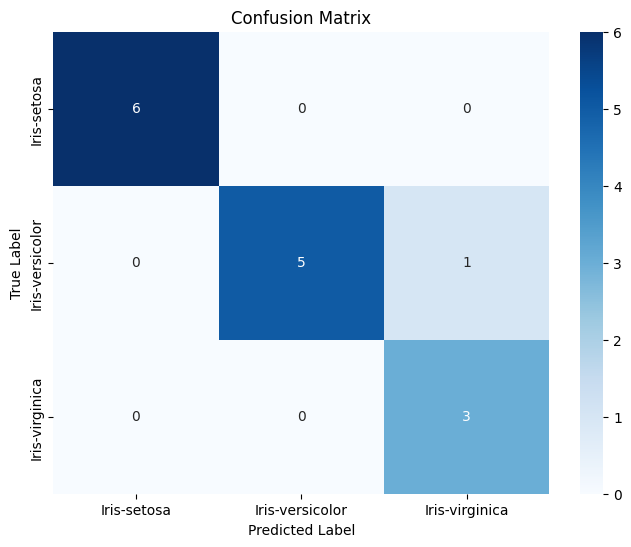

In [55]:
cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=ord_enc, yticklabels=ord_enc)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from collections import Counter

In [ ]:
label_pred = ord_enc.inverse_transform(y_pred.reshape(-1,1)).ravel()
Counter(label_pred)

Counter({'Iris-versicolor': 6, 'Iris-setosa': 6, 'Iris-virginica': 3})